In [2]:
from keras.preprocessing.image import img_to_array
import utils
from tensorflow.keras.models import load_model
import numpy as np
import cv2
#from tensorflow.keras.models import model_from_json
#import tensorflow as tf
from matplotlib import pyplot as plt
import subprocess
import time
import random
import os

In [3]:
face_classifier= cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))


In [4]:
emotion_model=load_model("model.h5")

In [5]:
EMOTIONS_LIST = ["Angry", "Disgust", "Fear", "Happy", "Neutral","Sad","Surprised"]

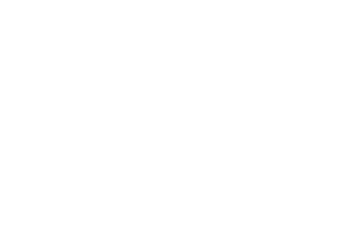

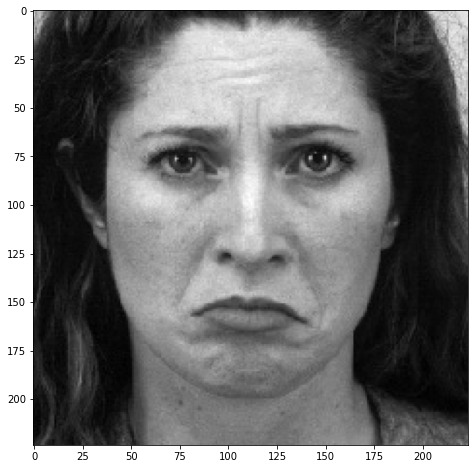

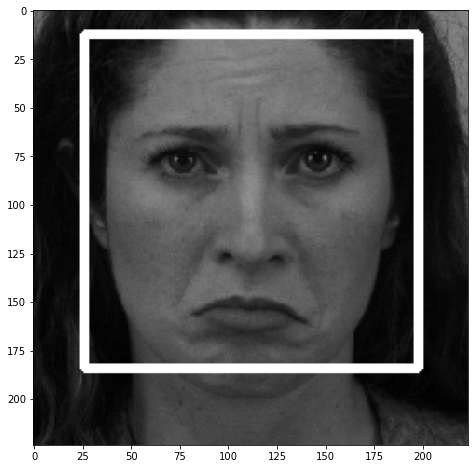

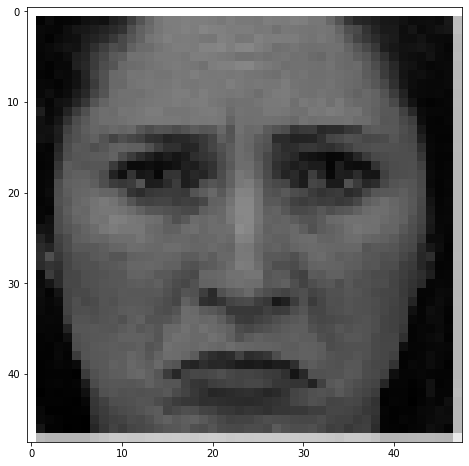

In [9]:
# Load the image
gray = cv2.imread('C:\\Users\\rayudu sushma\\Desktop\\dataset\\sadness\\AF11SAS.PNG', 0)
#gray = cv2.imread('AF11SAS.JPG', 0)
#im_plt = plt.imread("C:\\Users\\rayudu sushma\\Desktop\\dataset\\sadness\\AF11SAS.JPG",0)
#gray = cv2.imread("AF11SAS.JPG",0)[:, :, ::-1] #OpenCV users BGR instead of RGB

plt.axis("off")
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()
# Detect faces
faces = face_classifier.detectMultiScale(
gray,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
    
    
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()
fc = gray[y:y+h, x:x+w]
roi = cv2.resize(fc, (48, 48))
plt.figure(figsize=(12,8))
plt.imshow(roi, cmap='gray')
plt.show()

In [10]:
print(roi[np.newaxis, :, :, np.newaxis])

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [ 10]
   [ 19]
   ...
   [ 18]
   [ 31]
   [190]]

  [[255]
   [ 16]
   [ 14]
   ...
   [ 26]
   [ 29]
   [191]]

  ...

  [[255]
   [ 16]
   [ 13]
   ...
   [ 20]
   [ 20]
   [185]]

  [[255]
   [ 28]
   [ 10]
   ...
   [ 18]
   [ 11]
   [185]]

  [[255]
   [188]
   [183]
   ...
   [184]
   [183]
   [235]]]]


In [11]:
def predict_emotion(img):
        preds = emotion_model.predict(img)
        return EMOTIONS_LIST[np.argmax(preds)]
pred = predict_emotion(roi[np.newaxis, :, :, np.newaxis])
print(pred)

Sad


In [13]:
font = cv2.FONT_HERSHEY_SIMPLEX
now = time.time()
future = now+15


def predict_emotion(img):
        preds = emotion_model.predict(img)
        return EMOTIONS_LIST[np.argmax(preds)]
    
    
video_capture = cv2.VideoCapture(0)


while True:
    
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    frame = cv2.flip(frame, 1, 0)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
        )
    
    
    for (x, y, w, h) in faces:
        #if w > 250 :
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
            #roi_color = frame[y:y+h, x:x+w]
        roi = cv2.resize(roi_gray, (48, 48))
        pred = predict_emotion(roi[np.newaxis, :, :, np.newaxis])
        cv2.putText(frame, pred, (x+(w//3), y-5), font, 2, (0, 0, 255), 2)
        
    #print(pred) 
    #print(type(pred))
    cv2.imshow('Video', frame)
    key = cv2.waitKey(30)& 0xff
    #print(time.time())
    #print(future)
    if time.time() > future:##after 20second music will play
        try:
            #video_capture.release()
            cv2.destroyAllWindows()
            print(pred)
            mp = 'C:\\Program Files (x86)\\Windows Media Player\\wmplayer.exe'
            if pred == 'Angry':
                randomfile = random.choice(os.listdir("C:\\Users\\rayudu sushma\\3.2 project\\anger\\"))
        
                file = ('C:\\Users\\rayudu sushma\\3.2 project\\anger\\' + randomfile)
                subprocess.call([mp, file])

            if pred == 'Happy':
                randomfile = random.choice(os.listdir("C:\\Users\\rayudu sushma\\3.2 project\\happy\\"))
               
                file = ("C:\\Users\\rayudu sushma\\3.2 project\\happy\\" + randomfile)
                subprocess.call([mp, file])

            if pred == 'Disgust':
                randomfile = random.choice(os.listdir("C:\\Users\\rayudu sushma\\3.2 project\\disgust\\"))
               
                file = ('C:\\Users\\rayudu sushma\\3.2 project\\disgust\\' + randomfile)
                subprocess.call([mp, file])

            if pred == 'Sad':
                randomfile = random.choice(os.listdir("C:\\Users\\rayudu sushma\\3.2 project\\sad\\"))
                
                file = ('C:\\Users\\rayudu sushma\\3.2 project\\sad\\' + randomfile)
                subprocess.call([mp, file])
                
            if pred == 'Neutral':
                randomfile = random.choice(os.listdir("C:\\Users\\rayudu sushma\\3.2 project\\neutral\\"))
                
                file = ('C:\\Users\\rayudu sushma\\3.2 project\\neutral\\' + randomfile)
                subprocess.call([mp, file])
                
            if pred == 'Fear':
                randomfile = random.choice(os.listdir("C:\\Users\\rayudu sushma\\3.2 project\\fear\\"))
                
                file = ('C:\\Users\\rayudu sushma\\3.2 project\\fear\\' + randomfile)
                subprocess.call([mp, file])
            
            if pred == 'Surprised':
                randomfile = random.choice(os.listdir("C:\\Users\\rayudu sushma\\3.2 project\\surpise\\"))
                
                file = ('C:\\Users\\rayudu sushma\\3.2 project\\surpise\\' + randomfile)
                subprocess.call([mp, file])
              
            break
        
        except :
            print('Please stay focus in Camera frame atleast 15 seconds & run again this program:)')
            break
    if key == 27:
        break
video_capture.release()
#cv2.destroyAllWindows()
            

Neutral


In [15]:
randomfile = random.choice(os.listdir("C:\\Users\\rayudu sushma\\3.2 project\\neutral\\"))
file = ('C:\\Users\\rayudu sushma\\3.2 project\\neutral\\' + randomfile)
subprocess.call([mp, file])
                

0